In [164]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [165]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [166]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [167]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [168]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(autoload_with = engine)
base.classes.keys()

# reflect the tables


['measurement', 'station']

In [169]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [170]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [171]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [172]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

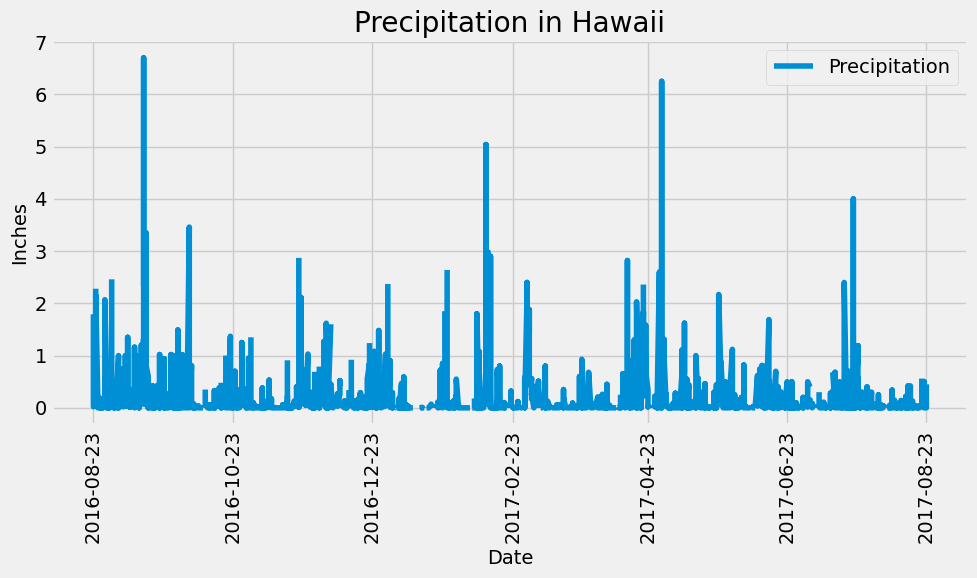

In [173]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
#mostrecent
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#oneyear
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()
#lastyear

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(last_year, columns=['date', 'precipitation'])
#lastyear_df.head()
# Sort the dataframe by date
last_year_df = last_year_df.sort_values(by='date',ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.plot(last_year_df['date'], last_year_df['precipitation'])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in Hawaii")
plt.legend(["Precipitation"])
#list only a few dates
plt.xticks(['2016-08-23','2016-10-23','2016-12-23','2017-02-23','2017-04-23','2017-06-23','2017-08-23'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [174]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [175]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(measurement.station).distinct().count()
unique_stations

9

In [176]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
total_measurements = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.
total_measurements

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [177]:
last_year_df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [178]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = total_measurements[0][0]
#Calculate the lowerst, highest and average temperatures for most_active
busiest_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active).all()
busiest_station

[(54.0, 85.0, 71.66378066378067)]

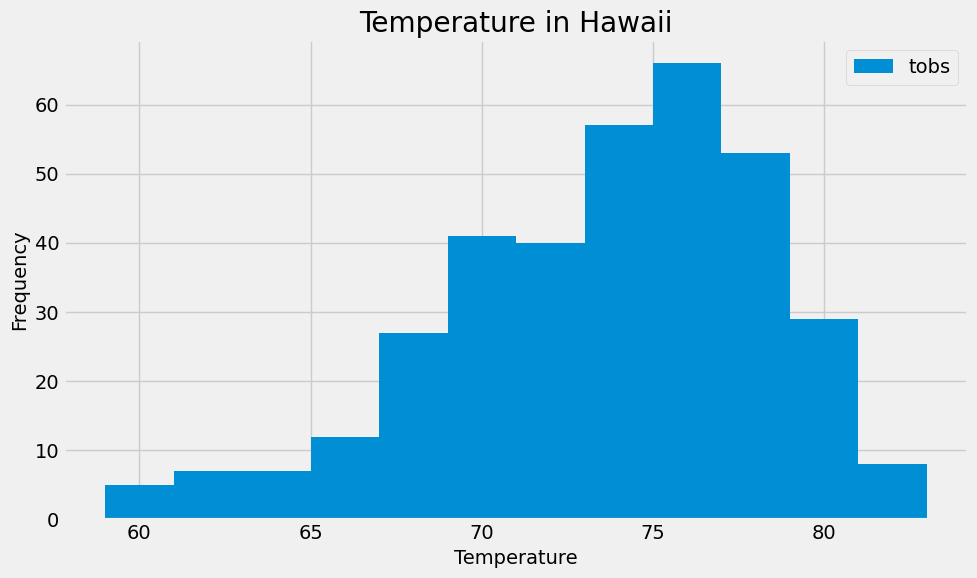

In [179]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastyearstation = session.query(measurement.tobs).filter(measurement.station == most_active).filter(measurement.date >= one_year).all()
lastyearstation_df = pd.DataFrame(lastyearstation, columns=['tobs'])
#plot lastyearstation_df using histogram
plt.figure(figsize=(10,6))
plt.hist(lastyearstation_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature in Hawaii")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()



# Close Session

In [16]:
# Close Session
session.close()